# Data Exploration

## Import

In [1]:
import re
import os
import yaml
import random
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

import sys
sys.path.append('../')
from src.data_preparation import count_words, count_charecters, get_words, get_charecters, has_html
from src.utility import *

## Reading Config File

In [2]:
with open("../config.yaml") as f:
    config = yaml.safe_load(f)
    config = config["exploration"]
fix_config_types(config)
    
RAW_CSV = os.path.join("../", config["raw_csv"])
SAVE_FIG = config["save_fig"]
FIG_SAVE_DIR = os.path.join("../", config["fig_save_dir"])
RESULR_FILE_NAME = config["result_file_name"]
RESULT_SAVE_DIR = os.path.join("../", config["result_save_dir"])

## Load Data

In [3]:
df = pd.read_csv(RAW_CSV)

## Basic Dataset Check

In [4]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.describe(include=["object"])

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
df[df.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


## Sentiment Distribution

In [9]:
sd = pd.DataFrame(df['sentiment'].value_counts())
sd

,count
sentiment,
positive,25000
negative,25000


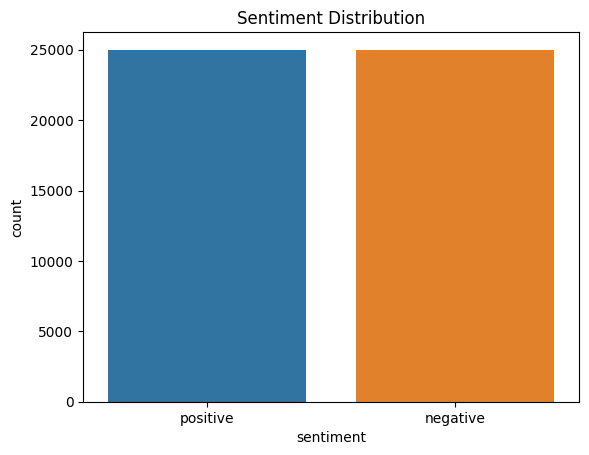

In [10]:
sns.barplot(x='sentiment', y='count', data=sd, hue='sentiment')
plt.title("Sentiment Distribution")
if SAVE_FIG:
    plt.savefig(os.path.join(FIG_SAVE_DIR, 'Sentiment_Distribution.png'))
plt.show()

## Text Characteristics

### Calculating Number of Charecters

In [11]:
n = random.choice(df.index.values.tolist())
df.iloc[n]['review']

"Outside the household is a different world and the family struggle to tread the line between Dads authority and their hopes and dreams.<br /><br /> The period is captured; The bakelite light swithes, the Georgian floorpan, the picture rails, the wall paper, the short skirts, the cheeky lads, the Mini van, shiny modern mangles....<br /><br /> The location is captured; A wind lashed glacier hewn rocky landscape, walls of local stone, community, freedom.<br /><br /> But there is much much more; Childhood, happiness, sensuality, pride, values, freedom, authority, rebellion, violence (in the deepest sense), love, struggle, puberty, naivety, morality, trust, faith, deceit, machismo, manners, maturity, loss, poverty, sacrifice, horror, acceptence, revelation, comedy and parenthood are all there. (And in no particular order!).<br /><br /> This film is a richly woven expression of family tensions that are as relevent today as ever. The fact that some of these aren't tackled directly is testame

In [12]:
get_charecters(df.iloc[n]['review'])

['O',
 'u',
 't',
 's',
 'i',
 'd',
 'e',
 't',
 'h',
 'e',
 'h',
 'o',
 'u',
 's',
 'e',
 'h',
 'o',
 'l',
 'd',
 'i',
 's',
 'a',
 'd',
 'i',
 'f',
 'f',
 'e',
 'r',
 'e',
 'n',
 't',
 'w',
 'o',
 'r',
 'l',
 'd',
 'a',
 'n',
 'd',
 't',
 'h',
 'e',
 'f',
 'a',
 'm',
 'i',
 'l',
 'y',
 's',
 't',
 'r',
 'u',
 'g',
 'g',
 'l',
 'e',
 't',
 'o',
 't',
 'r',
 'e',
 'a',
 'd',
 't',
 'h',
 'e',
 'l',
 'i',
 'n',
 'e',
 'b',
 'e',
 't',
 'w',
 'e',
 'e',
 'n',
 'D',
 'a',
 'd',
 's',
 'a',
 'u',
 't',
 'h',
 'o',
 'r',
 'i',
 't',
 'y',
 'a',
 'n',
 'd',
 't',
 'h',
 'e',
 'i',
 'r',
 'h',
 'o',
 'p',
 'e',
 's',
 'a',
 'n',
 'd',
 'd',
 'r',
 'e',
 'a',
 'm',
 's',
 'b',
 'r',
 'b',
 'r',
 'T',
 'h',
 'e',
 'p',
 'e',
 'r',
 'i',
 'o',
 'd',
 'i',
 's',
 'c',
 'a',
 'p',
 't',
 'u',
 'r',
 'e',
 'd',
 'T',
 'h',
 'e',
 'b',
 'a',
 'k',
 'e',
 'l',
 'i',
 't',
 'e',
 'l',
 'i',
 'g',
 'h',
 't',
 's',
 'w',
 'i',
 't',
 'h',
 'e',
 's',
 't',
 'h',
 'e',
 'G',
 'e',
 'o',
 'r',
 'g',
 'i'

In [13]:
count_charecters(df.iloc[n]['review'])

1548

In [14]:
df['review_charecters_len'] = df['review'].apply(count_charecters)
df['review_charecters_len']

0        1377
1         793
2         721
3         569
4        1032
         ... 
49995     769
49996     505
49997    1006
49998     995
49999     526
Name: review_charecters_len, Length: 50000, dtype: int64

In [15]:
df.iloc[n]['review_charecters_len']

np.int64(1548)

### Calculating Number of Words

In [16]:
n = random.choice(df.index.values.tolist())
df.iloc[n]['review']

"THE SECRET OF KELLS may be the most exquisite film I have seen since THE TRIPLETS OF BELLEVILLE. Although stylistically very different, KELLS shares with TRIPLETS and (the jaw-dropping opening 2D sequence of) KUNG FU PANDA, incredible art direction, production design, background/layout and a richness in color that is a feast for one's senses. KELLS is so lavish -- almost Gothic in its layout (somewhat reminiscent of Klimt), wonderfully flat in general overall perspective, ornate in its Celtic & illuminated design, yet the characters are so simplistic and appealing -- AND it all works together beautifully. You fall in love with the characters from the moment you meet them. You are so drawn to every detail of the story and to every stroke of the pencil & brush. What Tomm, Nora, Ross, Paul and all at Cartoon Saloon (& their extended crews) have achieved with this small budget/VERY small crewed film, is absolutely astounding. The groundswell of support amongst our animation community is p

In [17]:
get_words(df.iloc[n]['review'])

['THE',
 'SECRET',
 'OF',
 'KELLS',
 'may',
 'be',
 'the',
 'most',
 'exquisite',
 'film',
 'I',
 'have',
 'seen',
 'since',
 'THE',
 'TRIPLETS',
 'OF',
 'BELLEVILLE',
 'Although',
 'stylistically',
 'very',
 'different',
 'KELLS',
 'shares',
 'with',
 'TRIPLETS',
 'and',
 'the',
 'jaw',
 'dropping',
 'opening',
 '2D',
 'sequence',
 'of',
 'KUNG',
 'FU',
 'PANDA',
 'incredible',
 'art',
 'direction',
 'production',
 'design',
 'background',
 'layout',
 'and',
 'a',
 'richness',
 'in',
 'color',
 'that',
 'is',
 'a',
 'feast',
 'for',
 'one',
 's',
 'senses',
 'KELLS',
 'is',
 'so',
 'lavish',
 'almost',
 'Gothic',
 'in',
 'its',
 'layout',
 'somewhat',
 'reminiscent',
 'of',
 'Klimt',
 'wonderfully',
 'flat',
 'in',
 'general',
 'overall',
 'perspective',
 'ornate',
 'in',
 'its',
 'Celtic',
 'illuminated',
 'design',
 'yet',
 'the',
 'characters',
 'are',
 'so',
 'simplistic',
 'and',
 'appealing',
 'AND',
 'it',
 'all',
 'works',
 'together',
 'beautifully',
 'You',
 'fall',
 'in',
 

In [18]:
count_words(df.iloc[n]['review'])

207

In [19]:
df['review_word_len'] = df['review'].apply(count_words)
df['review_word_len']

0        320
1        166
2        172
3        141
4        236
        ... 
49995    205
49996    115
49997    240
49998    217
49999    129
Name: review_word_len, Length: 50000, dtype: int64

In [20]:
df.iloc[n]['review_word_len']

np.int64(207)

### Describe

In [21]:
df

,review,sentiment,review_charecters_len,review_word_len
0,One of the other reviewers has mentioned that ...,positive,1377,320
1,A wonderful little production. <br /><br />The...,positive,793,166
2,I thought this was a wonderful way to spend ti...,positive,721,172
3,Basically there's a family where a little boy ...,negative,569,141
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1032,236
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,769,205
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,505,115
49997,I am a Catholic taught in parochial elementary...,negative,1006,240
49998,I'm going to have to disagree with the previou...,negative,995,217


In [22]:
df.describe()

,review_charecters_len,review_word_len
count,50000.000000,50000.000000
mean,1026.598680,239.537900
std,780.019859,177.383495
min,25.000000,6.000000
25%,546.000000,131.000000
50%,759.000000,179.000000
75%,1246.000000,291.000000
max,10877.000000,2525.000000


### Plots

#### Word Length 

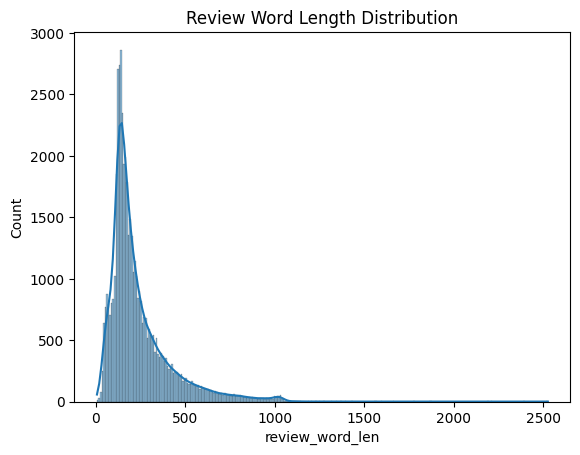

In [23]:
sns.histplot(df["review_word_len"], kde=True)
plt.title("Review Word Length Distribution")
if SAVE_FIG:
    plt.savefig(os.path.join(FIG_SAVE_DIR,"review_word_length_histplot.png"))
plt.show()

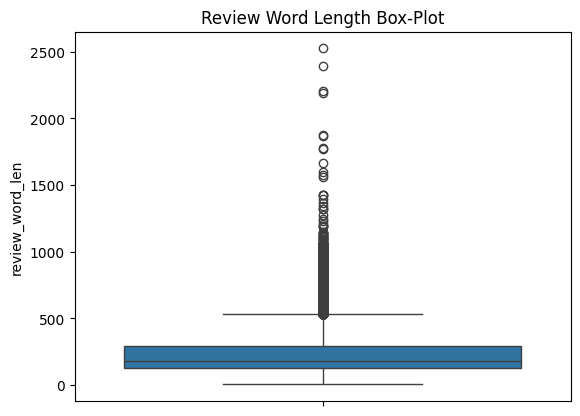

In [24]:
sns.boxplot(df["review_word_len"])
plt.title("Review Word Length Box-Plot")
if SAVE_FIG:
    plt.savefig(os.path.join(FIG_SAVE_DIR, "review_word_length_boxplot.png"))
plt.show()

#### Charecters Length

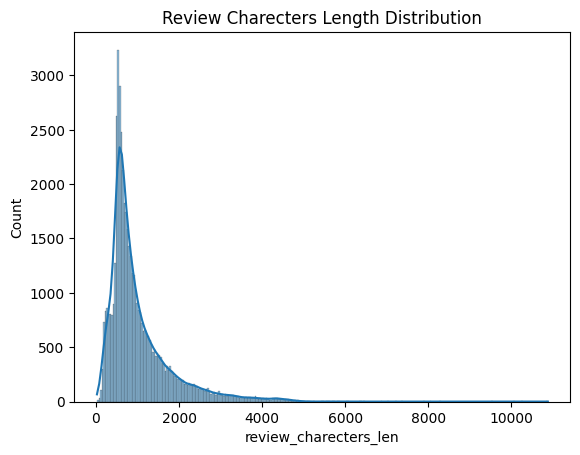

In [25]:
sns.histplot(df["review_charecters_len"], kde=True)
plt.title("Review Charecters Length Distribution")
if SAVE_FIG:
    plt.savefig(os.path.join(FIG_SAVE_DIR, "review_charecters_length_histplot.png"))
plt.show()

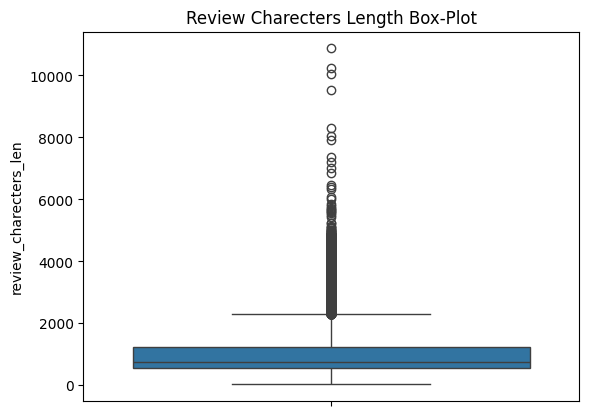

In [26]:
sns.boxplot(df["review_charecters_len"])
plt.title("Review Charecters Length Box-Plot")
if SAVE_FIG:
    plt.savefig(os.path.join(FIG_SAVE_DIR, "review_charecters_length_boxplot.png"))
plt.show()

### Counting Outlires in Reviwes using Word Lengeth

In [27]:
q1, q3 = df["review_word_len"].quantile([.25, .75])
q1, q3

(131.0, 291.0)

In [28]:
iqr = q3 - q1
iqr

160.0

In [29]:
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
lower_limit, upper_limit

(-109.0, 531.0)

In [30]:
(df['review_word_len'] < lower_limit).sum()

np.int64(0)

In [31]:
# Only using upper_limit because the min value for word len is 0 but lower_limit is -109
outlires = df[df['review_word_len'] > upper_limit]
outlires

,review,sentiment,review_charecters_len,review_word_len
26,"""The Cell"" is an exotic masterpiece, a dizzyin...",positive,2448,589
29,'War movie' is a Hollywood genre that has been...,positive,3047,636
33,One of the most significant quotes from the en...,positive,3228,679
48,Preston Sturgis' THE POWER AND THE GLORY was u...,positive,3115,720
51,"***SPOILERS*** All too, in real life as well a...",positive,2637,636
...,...,...,...,...
49946,One of the greatest lessons I ever had in how ...,negative,2227,548
49948,"It is the early morning of our discontent, and...",negative,4626,1023
49954,Why is it that every time I mention this movie...,negative,2167,538
49959,"My thoughts on the movie, 9<br /><br />It was ...",negative,2689,652


In [32]:
random.choice(outlires['review'].tolist())

'Mobile Suit Gundam Wing is the Fourth series in the continuing Gundam chronicles. Unlike the previous entries which focused on massive wars, this one is a little different; instead of having an army-vs.-army situation, this one is led by five teenage boys (due to their ability to blend in more readily than normal adults) and their machines called "Gundams" because of the metal alloy used in their construction. Which leads to problems, since gundams are supposed to be destroyed, replaced by "Mobile Suits", which are piloted less-destructive weapon platforms and "Dolls" which are ran on A.I. and are used as grunt infantry.<br /><br />The whole point of the series is a metaphysical question that gives Gundam Wing an edge over a greater portion of the Anime that makes it\'s way here. Especially since most anime is adapted from popular magazines, such as Naruto, DragonBall, One Piece, DragonBall Z and InuYasha which are all from Shonen Jump, which is now available in America.<br /><br />Mo

In [33]:
df[df["review_word_len"] < 60]

,review,sentiment,review_charecters_len,review_word_len
9,If you like original gut wrenching laughter yo...,positive,132,34
14,This a fantastic movie of three prisoners who ...,positive,219,51
63,"Besides being boring, the scenes were oppressi...",negative,212,48
112,It's terrific when a funny movie doesn't make ...,negative,170,45
160,MYSTERY MEN has got to be THE stupidest film I...,positive,223,56
...,...,...,...,...
49789,"Great characters, great acting, great dialogue...",positive,187,46
49902,Greenaway seems to have a habit of trying deli...,negative,284,58
49910,This is one of those movies that showcases a g...,positive,195,48
49929,This is John Waters best film to date. The cha...,positive,214,49


In [34]:
random.choice(df[df["review_word_len"] < 60]['review'].tolist())

"If you haven't seen this, it's terrible. It is pure trash. I saw this about 17 years ago, and I'm still screwed up from it."

### Counting Outlires in Reviwes using Charecter Lengeth

In [35]:
q1, q3 = df["review_charecters_len"].quantile([.25, .75])
q1, q3

(546.0, 1246.0)

In [36]:
iqr = q3 - q1
iqr

700.0

In [37]:
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
lower_limit, upper_limit

(-504.0, 2296.0)

In [38]:
(df['review_charecters_len'] < lower_limit).sum()

np.int64(0)

In [39]:
# Only using upper_limit because the min value for charecters len is 0 but lower_limit is -504
outlires = df[df['review_charecters_len'] > upper_limit]
outlires

,review,sentiment,review_charecters_len,review_word_len
26,"""The Cell"" is an exotic masterpiece, a dizzyin...",positive,2448,589
29,'War movie' is a Hollywood genre that has been...,positive,3047,636
33,One of the most significant quotes from the en...,positive,3228,679
48,Preston Sturgis' THE POWER AND THE GLORY was u...,positive,3115,720
51,"***SPOILERS*** All too, in real life as well a...",positive,2637,636
...,...,...,...,...
49925,"What a disaster! Normally, when one critiques ...",negative,3317,759
49943,"""Sir"" has played Lear over 200 times,but tonig...",positive,2856,618
49948,"It is the early morning of our discontent, and...",negative,4626,1023
49959,"My thoughts on the movie, 9<br /><br />It was ...",negative,2689,652


In [40]:
random.choice(outlires['review'].tolist())

'By 1909, D.W. Griffith had been directing films for the Biograph Company for about a year, and \x96 working at a rate of two or three per week \x96 was rapidly beginning to develop his skills as a filmmaker. \'The Sealed Room\' is a very interesting 11 minute short, a fascinating piece of Gothic melodrama that even drifts slightly into the realm of early horror. The simple narrative was probably inspired by Edgar Allen Poe\'s 1846 short story, "The Cask of Amontillado," and concerns a powerful king who conceives a deliciously sadistic form of revenge to punish his wife\'s infidelity.<br /><br />Set in medieval times, \'The Sealed Room\' begins with the king (Arthur V. Johnson) overseeing the construction of a windowless room from a sequestered dove-cote, the idea being that he and his wife (Marion Leonard) will have a completely private place to enjoy each other\'s company. He is obviously very much in love with her, always showing his affection, this latest act the crowning achieveme

In [41]:
df[df["review_charecters_len"] < 250]

,review,sentiment,review_charecters_len,review_word_len
9,If you like original gut wrenching laughter yo...,positive,132,34
14,This a fantastic movie of three prisoners who ...,positive,219,51
63,"Besides being boring, the scenes were oppressi...",negative,212,48
112,It's terrific when a funny movie doesn't make ...,negative,170,45
160,MYSTERY MEN has got to be THE stupidest film I...,positive,223,56
...,...,...,...,...
49920,I first saw this movie in the night program of...,positive,225,61
49929,This is John Waters best film to date. The cha...,positive,214,49
49942,"The movie is not that bad, Ringo Lam sucks. I ...",negative,117,33
49968,"I must say as a girl with a cowboy of my own,I...",positive,222,66


In [42]:
random.choice(df[df["review_charecters_len"] < 250]['review'].tolist())

"This is a charming movie starring everyone's favorite cartoon chipmunks. In this feature we follow the band of rodents on an unforgettable balloon race around the world. Although there are lows, including an orphan penguin, all in all it's a great family film."

## Quick Glance at Text

In [43]:
print("\n--- Example of a POSITIVE review ---\n")
random.choice(df[df['sentiment'] == 'positive']['review'].tolist())


--- Example of a POSITIVE review ---



"One of my desires is to be a film-maker, and I just have to say there's no way I will be able to compete with the powerful drama The War at Home. The reason is because the acting is perfect, and when you see the movie, you'll know what I'm talking about. All I can suggest is watching it, I got so involved in it and was extremely impressed.<br /><br />Estevez's and Sheen's relationship on the screen was absolutely amazing.<br /><br />And so was his relationship with his mother (Kathy Bates). Some of the best scenes include these 2. <br /><br />As well as the relationship between Sheen and his daughter, Estevez's sister in the film.<br /><br />10/10, and definitely in my top 10. I want the DVD!"

In [44]:
print("\n--- Example of a NEGATIVE review ---\n")
random.choice(df[df['sentiment'] == 'negative']['review'].tolist())


--- Example of a NEGATIVE review ---



"Utterly predictable silly show about a man who has killed his wife by mowing her down when driving and claimed he had blacked out. Why was he still driving a car? Why did he still feel able to drive a car having killed his wife with one? This question has not occurred to the writers. The story then witters on about a psychologist and her failing marriage which is tied into the failing marriage of wife-killing blackout driver. An omniscient mother and one dimensional child are thrown in for good measure, and the whole builds up to a predictable denouement and crashing finale. Are police psychologists so easily taken in? Deadful writing that the actors do their best with, but they are doomed to failure. This is on a par with a Harlequin Romance. Don't waste your time watching this one unless that's what you are aiming for."

In [45]:
df["has_html"] = df["review"].apply(has_html)
df["has_html"]

0         True
1         True
2         True
3         True
4         True
         ...  
49995     True
49996     True
49997     True
49998    False
49999     True
Name: has_html, Length: 50000, dtype: bool

In [46]:
df["has_html"].value_counts()

has_html
True     29202
False    20798
Name: count, dtype: int64

In [47]:
random.choice(df[df["has_html"] == False]['review'].tolist())

"I found the film quite good for what I was expecting. Although I weary, because I have a fear of injection needles, I sort of came to expect when they were coming. So if you're not into needles, blood, the human body, and some good medical fun, put this movie back and rent another. As the other user commented, I was also please at the German attempt at a slasher film. I'm an American who just moved to Germany to stay with a family and saw this lying on the shelf. I love psychological thrillers, and I'd say this is somewhere along those lines. A character falls into places and feels misconstrued. While trying to dig her way out and find some truth to a situation, things get a little sticky and other aren't so sure she's on the right track. So throughout the film you're kept on edge about who's anatomy you might catch a glimpse of and who's rounding the next corner."

## Saving the File

In [48]:
df.to_csv(os.path.join(RESULT_SAVE_DIR, RESULR_FILE_NAME), index=False)

## Observations

Total samples: 50,000  
Columns: review, sentiment  
Sentiment labels: balanced (25k positive, 25k negative)  

### Text Structure

For Words
1. Average review length: ~240 words
2. Shortest review: 6 words
3. Longest review: 2525 words
4. Quantiles (min, 25%, 50%, 75%, max): 6, 131, 179, 291, 2525
5. Distribution: not normal, right-skewed with a long tail and roughly 3.7k long reviews longer then 531 words.  

For Characters  
1. Average review length: ~1027 characters
2. Shortest review: 25 characters
3. Longest review: 10,877 characters
4. Quantiles (min, 25%, 50%, 75%, max): 25, 546, 759, 1246, 10877
5. Distribution: not normal, right-skewed with a long tail and around 3.75k long reviews longer then 2296 characters.  

### Text Quality / Formatting

~29k reviews contain HTML tags (e.g., \<br />, \<p>) which will need to be stripped.  
Punctuation and capitalization vary heavily.  
Some reviews include numbers, movie names, and actor mentions.  
Occasional typos and elongated words (“goooood”, “awwwesome”) — may need normalization.  

### Content Tone

Positive reviews often include adjectives (“amazing”, “beautifully done”, “heartwarming”).  
Negative reviews often include negations (“didn’t like”, “worst”, “boring”, “waste of time”).  
No neutral/mixed category — binary sentiment only.  